# Data set: European Social Survey (ESS) - Human values scale

* European Social Survey (ESS): https://ess-search.nsd.no/CDW/ConceptVariables
* chosen topic "Human values scale"
* chosen rounds: 4 + 9
* chosen countries: Bulgaria, Germany, Spain, Sweden, United Kingdom
* chosen questions: 'impenv','imprich', 'ipeqopt', 'iphlppl', 'ipstrgv'

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("./Data set/ESS-Data-Wizard-subset-2023-05-19.csv") #just round 9 data

## Legend

* impdiff - Important to try new and different things in life
* impenv - Important to care for nature and environment
* impfree - Important to make own decisions and be free
* impfun - Important to seek fun and things that give pleasure
* imprich - Important to be rich, have money and expensive things
* impsafe - Important to live in secure and safe surroundings
* imptrad - Important to follow traditions and customs
* ipadvnt - Important to seek adventures and have an exciting life
* ipbhprp - Important to behave properly
* ipcrtiv - Important to think new ideas and being creative
* ipeqopt - Important that people are treated equally and have equal opportunities
* ipfrule - Important to do what is told and follow rules
* ipgdtim - Important to have a good time
* iphlppl - Important to help people and care for others well-being
* iplylfr - Important to be loyal to friends and devote to people close
* ipmodst - Important to be humble and modest, not draw attention
* iprspot - Important to get respect from others
* ipshabt - Important to show abilities and be admired
* ipstrgv - Important that government is strong and ensures safety
* ipsuces - Important to be successful and that people recognize achievements
* ipudrst - Important to understand different people

*Further information about the data set:* 
* **CODEBOOK**: http://localhost:8888/lab/tree/Documents/GitHub/DDRM4DH_2023S/Data%20set/ESS-Data-Wizard-subset-2023-05-11/ESS-Data-Wizard-subset-2023-05-11%20codebook.html

In [16]:
data.head()

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,impenv,imprich,ipeqopt,iphlppl,ipstrgv
0,ESS4e04_5,4,4.5,01.12.2018,11,BG,0.8285,1.115312,0.296719,NaN,NaN,NaN,NaN,1,8,2,1,1
1,ESS4e04_5,4,4.5,01.12.2018,13,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,1,4,3,1,2
2,ESS4e04_5,4,4.5,01.12.2018,15,BG,1.2428,1.734877,0.296719,NaN,NaN,NaN,NaN,1,3,1,3,1
3,ESS4e04_5,4,4.5,01.12.2018,16,BG,1.2428,1.688932,0.296719,NaN,NaN,NaN,NaN,2,3,2,2,2
4,ESS4e04_5,4,4.5,01.12.2018,17,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,2,6,3,2,1


In [44]:
data.columns

Index(['name', 'essround', 'edition', 'proddate', 'idno', 'cntry', 'dweight',
       'pspwght', 'pweight', 'anweight', 'prob', 'stratum', 'psu', 'impenv',
       'imprich', 'ipeqopt', 'iphlppl', 'ipstrgv'],
      dtype='object')

In [35]:
print(data['cntry'].unique()) #countries --> Bulgaria, Germany, Spain, United Kingdom, Sweden

['BG' 'DE' 'ES' 'GB' 'SE']


In [36]:
print(data['name'].unique()) #round 4 and round 9

['ESS4e04_5' 'ESS9e03_1']


In [21]:
print(data['essround'].unique()) # ESS rounds of the data set

[4 9]


In [45]:
#dataframe: ROUND 4

round4 = ['ESS4e04_5']
df_round4 = data[data['name'].isin(round4)]
df_round4

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,impenv,imprich,ipeqopt,iphlppl,ipstrgv
0,ESS4e04_5,4,4.5,01.12.2018,11,BG,0.8285,1.115312,0.296719,NaN,NaN,NaN,NaN,1,8,2,1,1
1,ESS4e04_5,4,4.5,01.12.2018,13,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,1,4,3,1,2
2,ESS4e04_5,4,4.5,01.12.2018,15,BG,1.2428,1.734877,0.296719,NaN,NaN,NaN,NaN,1,3,1,3,1
3,ESS4e04_5,4,4.5,01.12.2018,16,BG,1.2428,1.688932,0.296719,NaN,NaN,NaN,NaN,2,3,2,2,2
4,ESS4e04_5,4,4.5,01.12.2018,17,BG,0.4143,0.557723,0.296719,NaN,NaN,NaN,NaN,2,6,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11734,ESS4e04_5,4,4.5,01.12.2018,300029907,SE,1.0000,0.930269,0.417552,NaN,NaN,NaN,NaN,4,6,3,3,5
11735,ESS4e04_5,4,4.5,01.12.2018,300029931,SE,1.0000,0.874434,0.417552,NaN,NaN,NaN,NaN,1,4,2,3,2
11736,ESS4e04_5,4,4.5,01.12.2018,300029956,SE,1.0000,1.770302,0.417552,NaN,NaN,NaN,NaN,2,4,1,2,3
11737,ESS4e04_5,4,4.5,01.12.2018,300029964,SE,1.0000,0.810594,0.417552,NaN,NaN,NaN,NaN,1,5,2,1,1


In [46]:
#dataframe: ROUND 9

round9 = ['ESS9e03_1']
df_round9 = data[data['name'].isin(round9)]
df_round9

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,prob,stratum,psu,impenv,imprich,ipeqopt,iphlppl,ipstrgv
11739,ESS9e03_1,9,3.1,17.02.2021,2,BG,1.121477,0.933234,0.275053,0.256689,0.000595,164.0,2538.0,1,4,4,2,2
11740,ESS9e03_1,9,3.1,17.02.2021,27,BG,0.489820,0.455268,0.275053,0.125223,0.001363,173.0,2627.0,1,5,4,1,1
11741,ESS9e03_1,9,3.1,17.02.2021,37,BG,1.199818,1.015035,0.275053,0.279188,0.000556,167.0,2558.0,3,3,4,9,9
11742,ESS9e03_1,9,3.1,17.02.2021,50,BG,0.729412,0.844708,0.275053,0.232339,0.000915,190.0,2755.0,3,4,3,3,2
11743,ESS9e03_1,9,3.1,17.02.2021,70,BG,1.100528,0.739642,0.275053,0.203440,0.000607,122.0,2301.0,2,5,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21701,ESS9e03_1,9,3.1,17.02.2021,69836,SE,1.000000,0.602229,0.540972,0.325789,0.000490,2836.0,24298.0,1,5,1,2,1
21702,ESS9e03_1,9,3.1,17.02.2021,69845,SE,1.000000,1.459512,0.540972,0.789555,0.000490,2830.0,23865.0,5,4,2,1,1
21703,ESS9e03_1,9,3.1,17.02.2021,69882,SE,1.000000,0.960054,0.540972,0.519362,0.000490,2833.0,23534.0,1,5,1,2,2
21704,ESS9e03_1,9,3.1,17.02.2021,69908,SE,1.000000,0.940854,0.540972,0.508976,0.000490,2831.0,23782.0,4,5,2,3,2


## Visualization

* Seaborn
* matplotlib


### imprich - Important to be rich, have money and expensive things
**Value 	Category**

* 1 	Very much like me
* 2 	Like me
* 3 	Somewhat like me
* 4 	A little like me
* 5 	Not like me
* 6 	Not like me at all
* 7 	Refusal*
* 8 	Don't know*
* 9 	No answer*

*) Missing Value


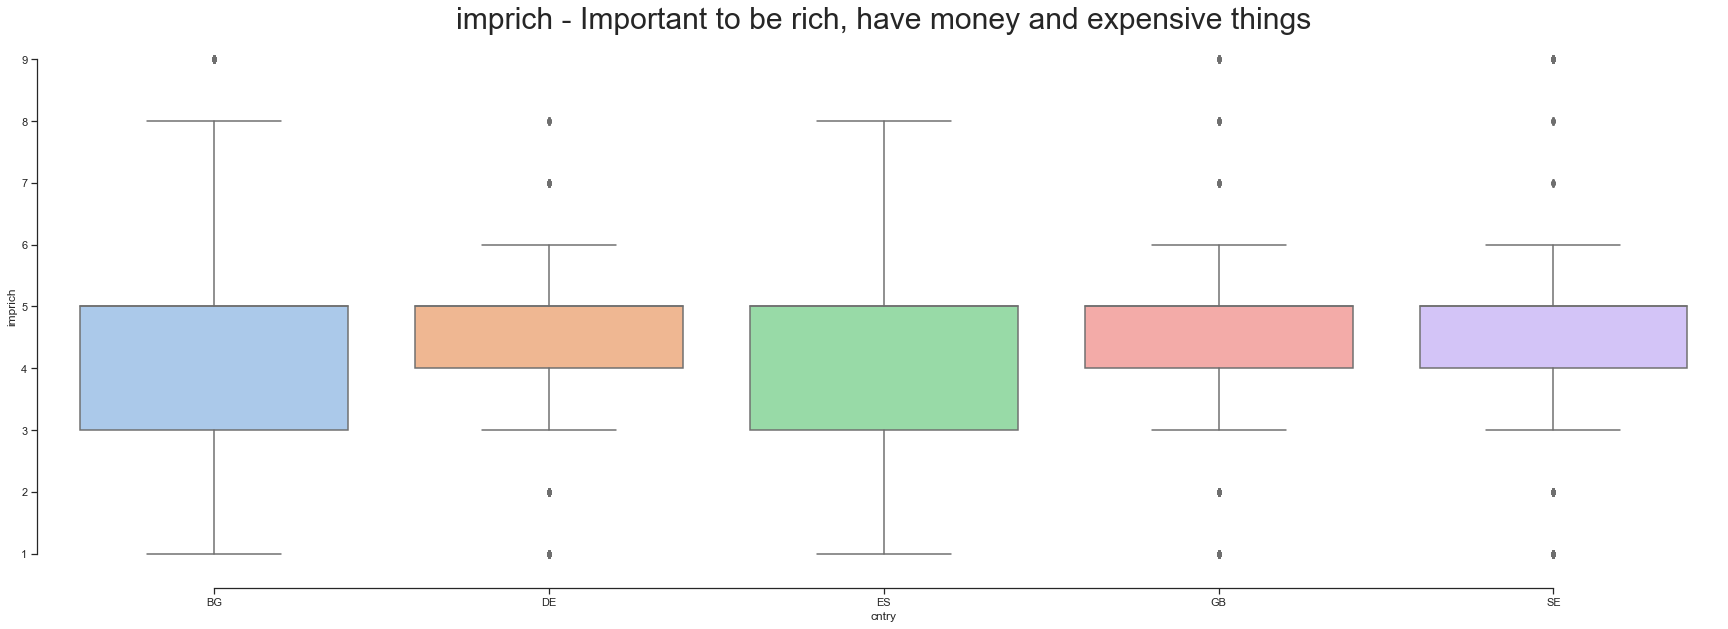

In [37]:
#grouped poxplot; values of ROUND 4 and ROUND 9

sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=data['cntry'], y=data['imprich'], data=data)
sns.despine(offset=10, trim=True) #remove frame
plt.title("imprich - Important to be rich, have money and expensive things", fontsize=30)
#plt.savefig('boxplot_cntry.png', bbox_inches='tight')
plt.show()

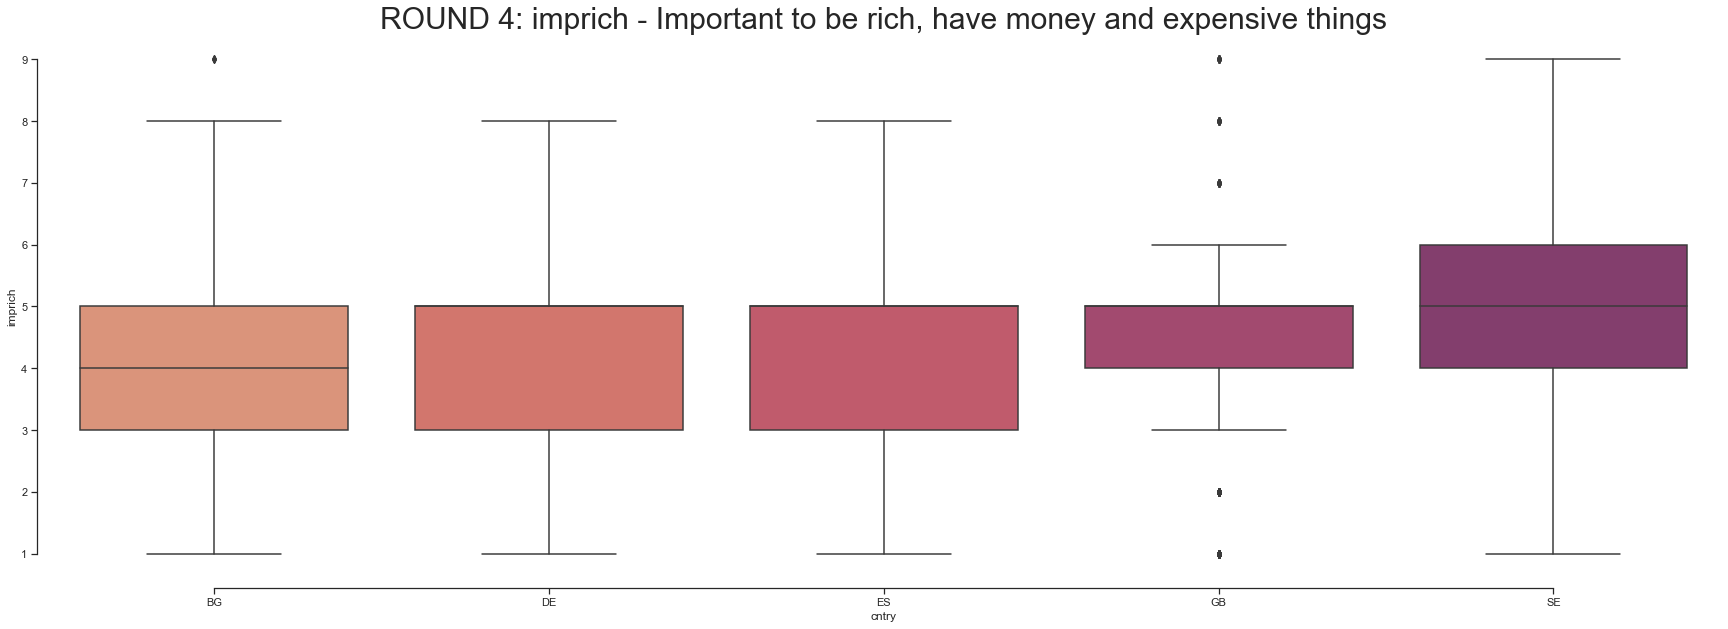

In [73]:
#grouped poxplot; values of ROUND 4

sns.set_theme(style="ticks", palette="flare")
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=df_round4['cntry'], y=df_round4['imprich'], data=df_round4)
sns.despine(offset=10, trim=True) #remove frame
plt.title("ROUND 4: imprich - Important to be rich, have money and expensive things", fontsize=30)
#plt.savefig('boxplot_cntry.png', bbox_inches='tight')
plt.show()

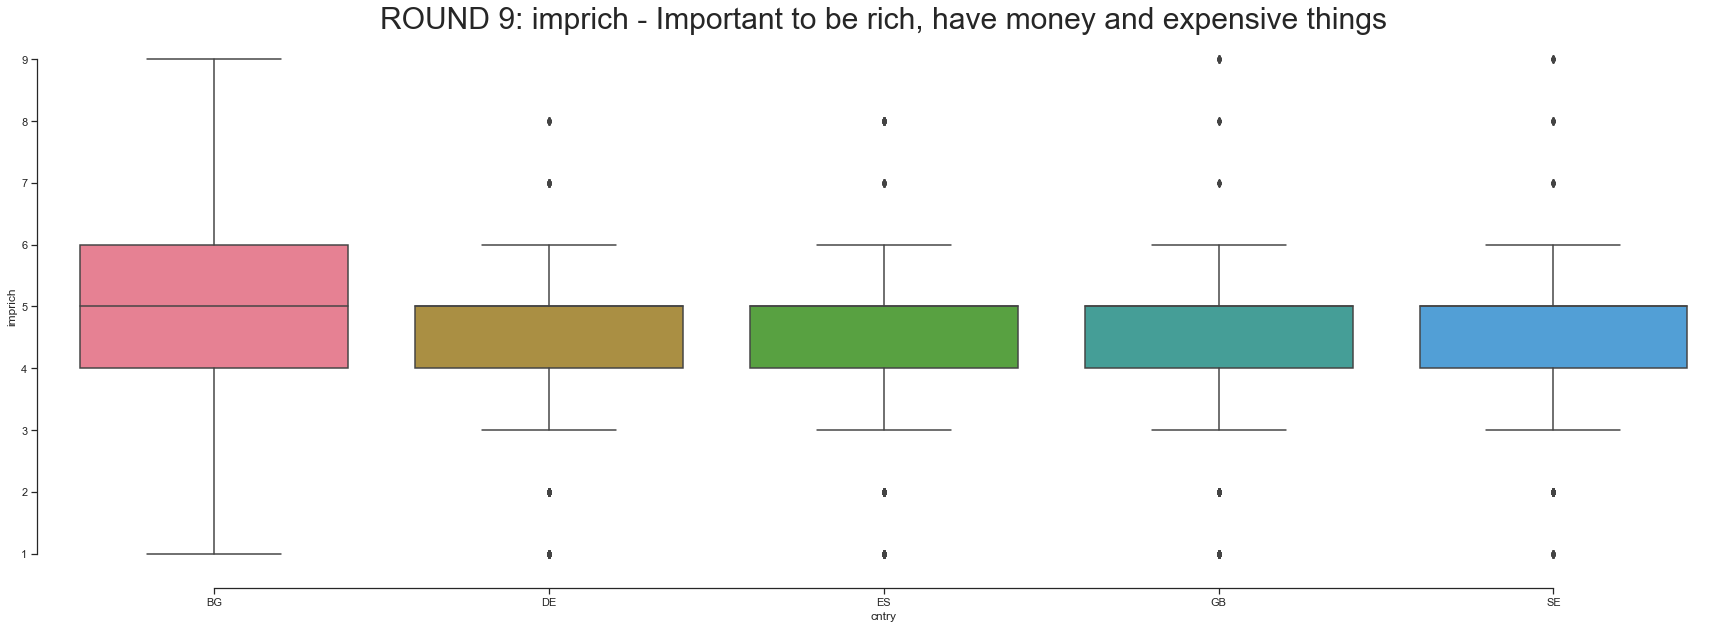

In [72]:
#grouped poxplot; values of ROUND 9

sns.color_palette("husl", 9)
sns.set_theme(style="ticks", palette="husl") # SOMETHING's wrong!
fig, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(x=df_round9['cntry'], y=df_round9['imprich'], data=df_round9)
sns.despine(offset=10, trim=True) #remove frame
plt.title("ROUND 9: imprich - Important to be rich, have money and expensive things", fontsize=30)
#plt.savefig('boxplot_cntry.png', bbox_inches='tight')
plt.show()

In [29]:
# choose one example to visualize 
data['imprich'].value_counts()

5    8567
4    4244
3    3184
6    2982
2    1466
1     532
9     337
8     247
7     147
Name: imprich, dtype: int64

In [30]:
# create dictionary

dict_imprich = data['imprich'].value_counts().to_dict()
dict_imprich

{5: 8567, 4: 4244, 3: 3184, 6: 2982, 2: 1466, 1: 532, 9: 337, 8: 247, 7: 147}

In [39]:
# change keys! --> ADD full answers

dict_imprich2 = data['imprich'].value_counts().to_dict()
dict_imprich2['1'] = dict_imprich2.pop(h')#CHANGE
dict_imprich2

SyntaxError: EOL while scanning string literal (2514723860.py, line 4)

https://www.geeksforgeeks.org/python-ways-to-change-keys-in-dictionary/

use pop-method to rename key in dictionary : ini_dict['akash'] = ini_dict.pop('akshat')

In [33]:
df_imprich = pd.DataFrame.from_dict(dict_imprich, orient='index', columns=['count'])
df_imprich.index.name = 'imprich - Value Category'
df_imprich = df_imprich.sort_index()
df_imprich

,count
imprich - Value Category,
1,532
2,1466
3,3184
4,4244
5,8567
6,2982
7,147
8,247
9,337


seaborn, grouped boxplot: https://seaborn.pydata.org/examples/grouped_boxplot.html

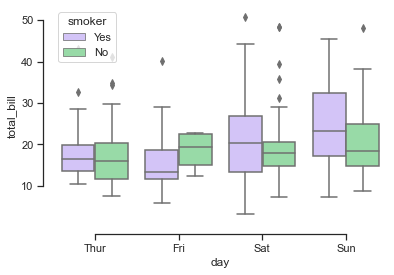

In [34]:
#use seaborn

sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [47]:
print(df_round9['cntry'].unique()) 

['BG' 'DE' 'ES' 'GB' 'SE']


**Try plotly!** More interactive than *Seaborn* https://plotly.com/python/box-plots/

### Choosing the right graph: 
* https://www.mymarketresearchmethods.com/types-of-charts-choose/